In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns   
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio



In [41]:
# Path to the SQLite database file
db_path = '../data/FPA_FOD_20170508.sqlite'

# Connect to the database
conn = sqlite3.connect(db_path)

# List all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)
print("Tables in the database:")
print(tables)


Tables in the database:
                                  name
0                      spatial_ref_sys
1                   spatialite_history
2                      sqlite_sequence
3                     geometry_columns
4                  spatial_ref_sys_aux
5               views_geometry_columns
6               virts_geometry_columns
7          geometry_columns_statistics
8    views_geometry_columns_statistics
9    virts_geometry_columns_statistics
10        geometry_columns_field_infos
11  views_geometry_columns_field_infos
12  virts_geometry_columns_field_infos
13               geometry_columns_time
14               geometry_columns_auth
15         views_geometry_columns_auth
16         virts_geometry_columns_auth
17                  sql_statements_log
18                        SpatialIndex
19                ElementaryGeometries
20                                 KNN
21                               Fires
22                     idx_Fires_Shape
23                idx_Fires_Shape_node
2

In [43]:
# Load the 'Fires' table into a DataFrame
fires_df = pd.read_sql('SELECT * FROM Fires', conn)

# Preview the first 5 records
print(fires_df.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [8]:
# Display dataset summary
print(fires_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

## Wildfire Dataset Column Descriptions


```
1. OBJECTID: Unique identifier for the record.
2. FOD_ID: Unique identifier within the dataset.
3. FPA_ID: Fire Program Analysis system identifier.
4. SOURCE_SYSTEM_TYPE: Type of reporting system (e.g., federal, nonfederal).
5. SOURCE_SYSTEM: Name of the reporting system.
6. NWCG_REPORTING_AGENCY: Agency reporting the fire (e.g., BLM, NPS).
7. NWCG_REPORTING_UNIT_ID: Unit ID reporting the fire.
8. NWCG_REPORTING_UNIT_NAME: Name of the reporting unit.
9. SOURCE_REPORTING_UNIT: Code of the reporting agency unit.
10. SOURCE_REPORTING_UNIT_NAME: Name of the reporting agency unit.
11. LOCAL_FIRE_REPORT_ID: Local fire report identifier.
12. LOCAL_INCIDENT_ID: Local incident identifier.
13. FIRE_CODE: Code used for fire cost tracking.
14. FIRE_NAME: Name of the fire incident.
15. ICS_209_INCIDENT_NUMBER: Incident number from ICS-209 report.
16. ICS_209_NAME: Incident name from ICS-209 report.
17. MTBS_ID: Monitoring Trends in Burn Severity project ID.
18. MTBS_FIRE_NAME: Name of fire in the MTBS dataset.
19. COMPLEX_NAME: Name of the fire complex (multiple fires managed together).
20. FIRE_YEAR: Year the fire was discovered.
21. DISCOVERY_DATE: Julian date of fire discovery.
22. DISCOVERY_DOY: Day of year the fire was discovered.
23. DISCOVERY_TIME: Time of day the fire was discovered.
24. STAT_CAUSE_CODE: Statistical code for cause of fire.
25. STAT_CAUSE_DESCR: Description of cause of fire (e.g., Lightning, Debris Burning).
26. CONT_DATE: Julian date when fire was contained.
27. CONT_DOY: Day of year when fire was contained.
28. CONT_TIME: Time of day fire was contained.
29. FIRE_SIZE: Final size of the fire in acres.
30. FIRE_SIZE_CLASS: Size classification (A=0-0.25 acres, B=0.26-9.9, ..., G=5000+).
31. LATITUDE: Latitude coordinate of fire origin.
32. LONGITUDE: Longitude coordinate of fire origin.
33. OWNER_CODE: Code for land ownership where fire occurred.
34. OWNER_DESCR: Description of land ownership.
35. STATE: State where the fire occurred.
36. COUNTY: County where the fire occurred.
37. FIPS_CODE: Federal Information Processing Standards county code.
38. FIPS_NAME: County name.
39. Shape: Geospatial shape data.

```

In [9]:
fires_df.describe

<bound method NDFrame.describe of          OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0               1          1         FS-1418826                FED   
1               2          2         FS-1418827                FED   
2               3          3         FS-1418835                FED   
3               4          4         FS-1418845                FED   
4               5          5         FS-1418847                FED   
...           ...        ...                ...                ...   
1880460   1880461  300348363  2015CAIRS29019636             NONFED   
1880461   1880462  300348373  2015CAIRS29217935             NONFED   
1880462   1880463  300348375  2015CAIRS28364460             NONFED   
1880463   1880464  300348377  2015CAIRS29218079             NONFED   
1880464   1880465  300348399  2015CAIRS26733926             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS            

In [10]:
# Check for missing values
missing_values = fires_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE              

##  Step 1.1: Missing Values Summary (Key Columns)

```

LOCAL_FIRE_REPORT_ID    - 77% missing
LOCAL_INCIDENT_ID       - 44% missing
FIRE_CODE               - 82% missing
FIRE_NAME               - 51% missing
ICS_209_INCIDENT_NUMBER - 98% missing
ICS_209_NAME            - 98% missing
MTBS_ID                 - 99% missing
MTBS_FIRE_NAME          - 99% missing
COMPLEX_NAME            - 99% missing
DISCOVERY_TIME          - 45% missing
CONT_DATE               - 45% missing
CONT_DOY                - 45% missing
CONT_TIME               - 49% missing
COUNTY                  - 36% missing
FIPS_CODE               - 36% missing
FIPS_NAME               - 36% missing

```

Many of these fields are not essential for wildfire risk prediction.

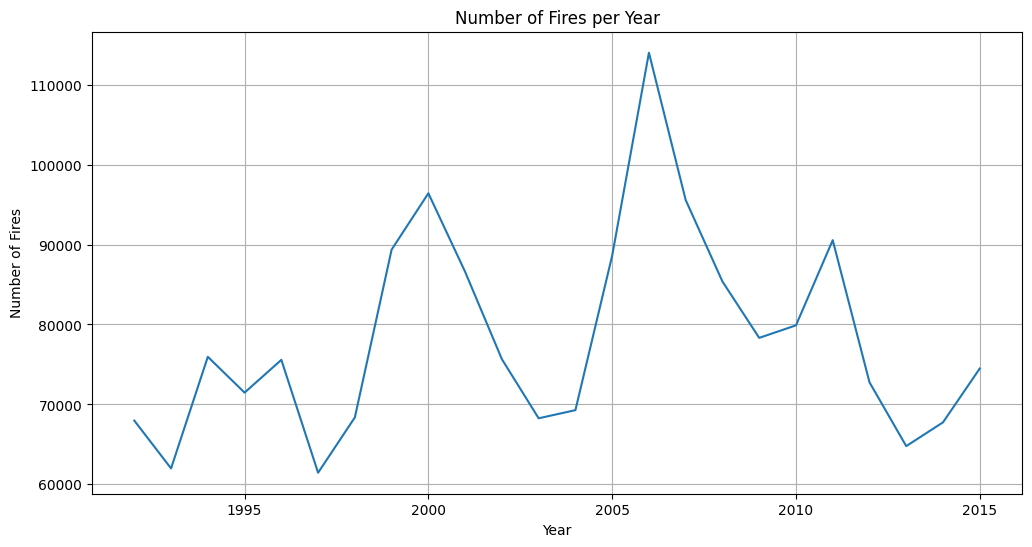

In [13]:
## 2.1 Fires Per Year
plt.figure(figsize=(12,6))
fires_per_year = fires_df['FIRE_YEAR'].value_counts().sort_index()
sns.lineplot(x=fires_per_year.index, y=fires_per_year.values)
plt.title('Number of Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.show()

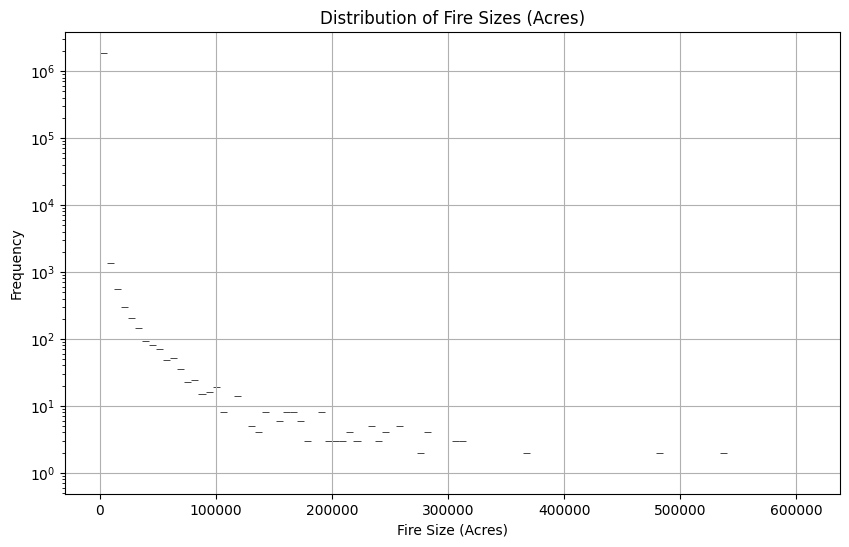

In [14]:
## 2.2 Fire Size Distribution
plt.figure(figsize=(10,6))
sns.histplot(fires_df['FIRE_SIZE'], bins=100, log_scale=(False, True))
plt.title('Distribution of Fire Sizes (Acres)')
plt.xlabel('Fire Size (Acres)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


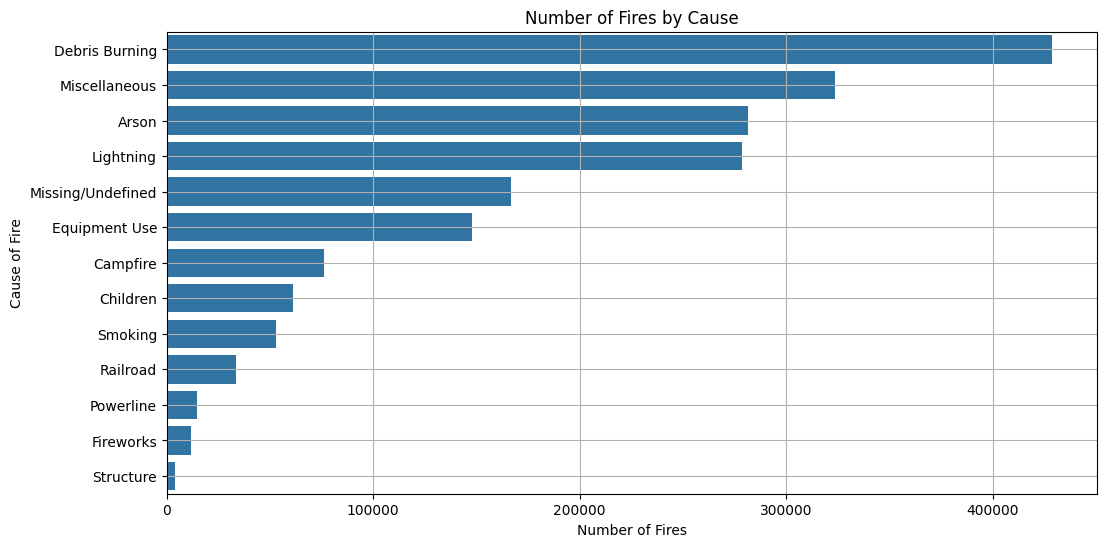

In [15]:
## 2.3 Fires by Cause
plt.figure(figsize=(12,6))
fires_by_cause = fires_df['STAT_CAUSE_DESCR'].value_counts()
sns.barplot(x=fires_by_cause.values, y=fires_by_cause.index)
plt.title('Number of Fires by Cause')
plt.xlabel('Number of Fires')
plt.ylabel('Cause of Fire')
plt.grid(True)
plt.show()

In [34]:
# Ensure Plotly rendering for browser fallback
pio.renderers.default = 'browser'

In [38]:
## 2.4 Fires by State - USA Map Visualization
fires_by_state = fires_df['STATE'].value_counts().reset_index()
fires_by_state.columns = ['STATE', 'Number_of_Fires']

fig = px.choropleth(
    fires_by_state,
    locations='STATE',
    locationmode='USA-states',
    color='Number_of_Fires',
    scope='usa',
    color_continuous_scale='Reds',
    title='Wildfires by State in the USA'
)

# Show in browser
fig.show()
print("Picture of this visualisation is saved in the Ouputs folder")

Picture of this visualisation is saved in the Ouputs folder


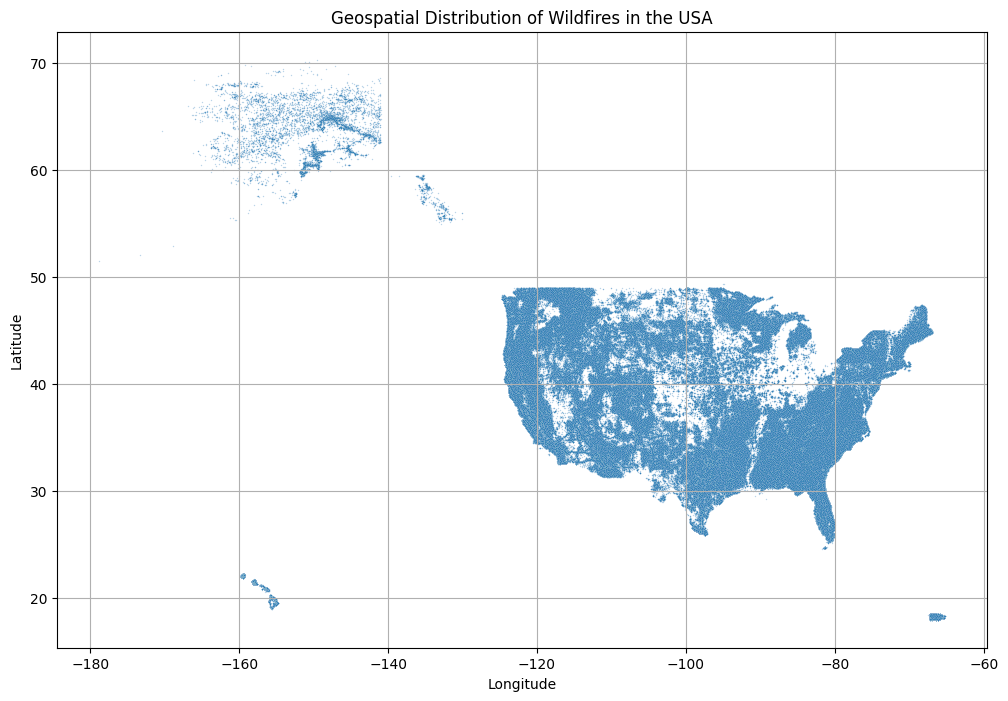

In [39]:
## 2.5 Geospatial Scatter Plot of Fire Locations
plt.figure(figsize=(12,8))
sns.scatterplot(x=fires_df['LONGITUDE'], y=fires_df['LATITUDE'], alpha=0.3, s=1)
plt.title('Geospatial Distribution of Wildfires in the USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

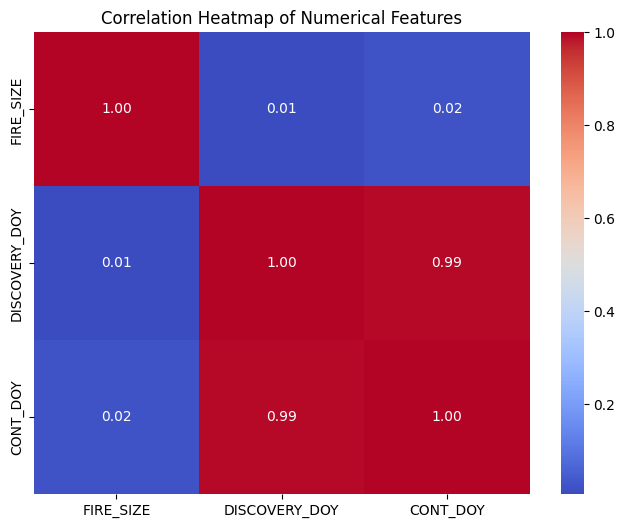

In [40]:
## 2.6 Correlation Heatmap
numerical_features = ['FIRE_SIZE', 'DISCOVERY_DOY', 'CONT_DOY']
correlation_matrix = fires_df[numerical_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()